## Signal Space

### Signal Space Concepts


#### Inner Product of Complex Signals 
The **inner product** of two complex-valued signals, $ x_1(t) $ and $ x_2(t) $, is defined as:  

$$
\langle x_1(t), x_2(t) \rangle = \int_{-\infty}^{\infty} x_1(t) x_2^*(t) \, dt
$$  

Here, $ x_2^*(t) $ denotes the complex conjugate of $ x_2(t) $.

#### Orthogonal Signals  

Two signals are considered **orthogonal** if their inner product is zero:  

$$
\langle x_1(t), x_2(t) \rangle = 0
$$  

#### Orthonormal Signals  

A set of $ m $ signals is **orthonormal** if:  
1. The signals are mutually orthogonal.  
2. Each signal has a norm of 1 (unit length).

### Norm and Signal Energy  

The **norm** of a signal $ x(t) $ is defined as:  

$$
\|x(t)\| = \sqrt{\int_{-\infty}^{\infty} |x(t)|^2 \, dt} = \sqrt{\mathcal{E}_x}
$$  

Here, $ \mathcal{E}_x $ represents the total **energy** of the signal $ x(t) $.  


### Linearly Independent Signals  

A set of $ m $ signals is considered **linearly independent** if no signal in the set can be expressed as a linear combination of the other signals.  

#### Python Example: Orthonormal Signals

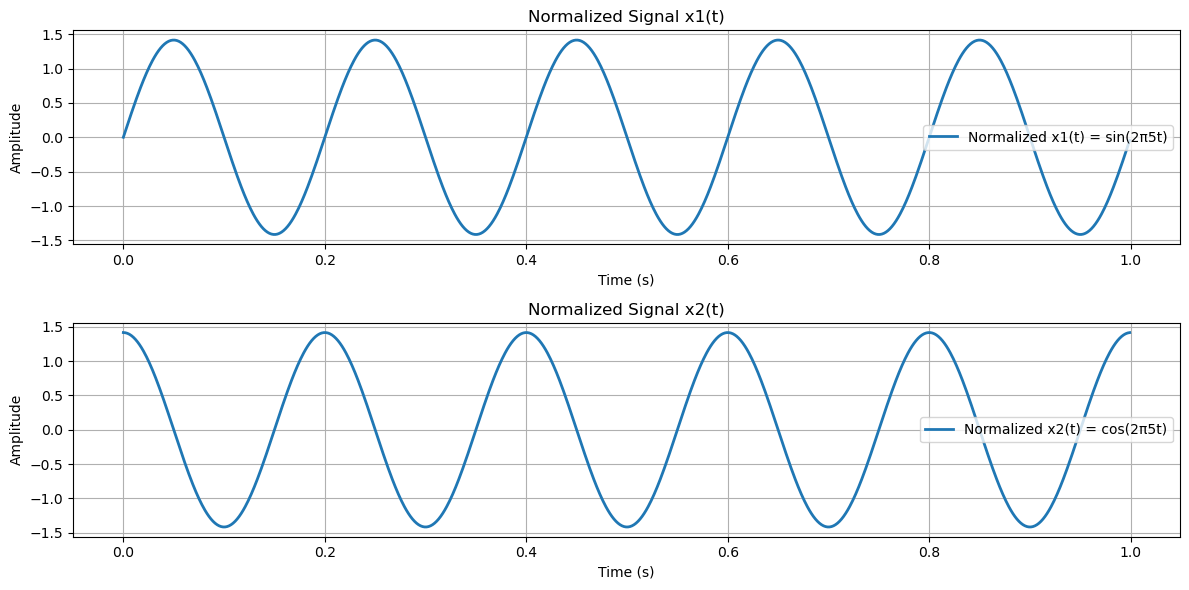

The norm of normalized x1(t) is: 1.000000
The norm of normalized x2(t) is: 1.000000
The inner product of the normalized signals is: 0.000031
The signals are orthonormal.


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the simulation parameters
Fs = 1000  # Sampling frequency in Hz
T = 1      # Duration of the signal in seconds
t = np.arange(0, T, 1/Fs)  # Time vector for one second worth of samples

# Define two signals
f = 5  # Common frequency
x1 = np.sin(2 * np.pi * f * t)  # First signal: sine wave
x2 = np.cos(2 * np.pi * f * t)  # Second signal: cosine wave (orthogonal to sine)

# Compute the norms (energy) of the signals
norm_x1 = np.sqrt(np.trapz(x1**2, t))
norm_x2 = np.sqrt(np.trapz(x2**2, t))

# Normalize the signals
x1_normalized = x1 / norm_x1
x2_normalized = x2 / norm_x2

# Compute the inner product of normalized signals
inner_product = np.trapz(x1_normalized * x2_normalized, t)

# Plot the signals
plt.figure(figsize=(12, 6))

# Plot x1(t)
plt.subplot(2, 1, 1)
plt.plot(t, x1_normalized, linewidth=2, label=f'Normalized x1(t) = sin(2π{f}t)')
plt.title('Normalized Signal x1(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot x2(t)
plt.subplot(2, 1, 2)
plt.plot(t, x2_normalized, linewidth=2, label=f'Normalized x2(t) = cos(2π{f}t)')
plt.title('Normalized Signal x2(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Output the results
print(f"The norm of normalized x1(t) is: {np.sqrt(np.trapz(x1_normalized**2, t)):.6f}")
print(f"The norm of normalized x2(t) is: {np.sqrt(np.trapz(x2_normalized**2, t)):.6f}")
print(f"The inner product of the normalized signals is: {inner_product:.6f}")

# Check orthonormality
tolerance = 1e-3  # Tolerance for numerical precision
is_x1_normalized = abs(np.sqrt(np.trapz(x1_normalized**2, t)) - 1) < tolerance
is_x2_normalized = abs(np.sqrt(np.trapz(x2_normalized**2, t)) - 1) < tolerance
is_orthogonal = abs(inner_product) < tolerance

if is_x1_normalized and is_x2_normalized and is_orthogonal:
    print("The signals are orthonormal.")
else:
    print("The signals are not orthonormal.")


### Some Important Inequalities

#### Triangle Inequality  

For two signals $ x_1(t) $ and $ x_2(t) $, the **triangle inequality** states:  

$$
\|x_1(t) + x_2(t)\| \leq \|x_1(t)\| + \|x_2(t)\|
$$  

This inequality highlights that the norm of the sum of two signals is never greater than the sum of their individual norms.

#### Cauchy–Schwarz Inequality  

The **Cauchy–Schwarz inequality** is a fundamental result that applies to the inner product of two signals $ x_1(t) $ and $ x_2(t) $:  

$$
|\langle x_1(t), x_2(t) \rangle| \leq \|x_1(t)\| \cdot \|x_2(t)\| = \sqrt{\mathcal{E}_{x_1} \mathcal{E}_{x_2}}
$$  

Equivalently, in integral form:  

$$
\left| \int_{-\infty}^{\infty} x_1(t) x_2^*(t) \, dt \right| \leq \sqrt{\int_{-\infty}^{\infty} |x_1(t)|^2 \, dt} \cdot \sqrt{\int_{-\infty}^{\infty} |x_2(t)|^2 \, dt}
$$  

Equality holds in the Cauchy–Schwarz inequality if and only if $ x_2(t) = a x_1(t) $, where $ a $ is any complex scalar.  

### Orthogonal Expansions of Signals

#### Vector Representation of Signals

We can represent signal waveforms as vectors, demonstrating the equivalence between a signal waveform and its vector representation.  

Let $ s(t) $ be a deterministic signal with finite energy:  

$$
\mathcal{E}_s = \int_{-\infty}^{\infty} |s(t)|^2 dt
$$  

Suppose there exists a set of orthonormal functions $ \{\phi_n(t)\}, n = 1, 2, ..., K $, such that:  

$$
\langle \phi_n(t), \phi_m(t) \rangle = \int_{-\infty}^{\infty} \phi_n(t) \phi_m^*(t) dt =
\begin{cases} 
1 & \text{if } n = m \\
0 & \text{if } n \neq m
\end{cases}
$$  

#### Approximation of Signals

The signal $ s(t) $ can be approximated as a weighted linear combination of these orthonormal functions:  

$$
\hat{s}(t) = \sum_{k=1}^{K} s_k \phi_k(t)
$$  

Here, $ \{s_k\} $ are the coefficients representing the projection of $ s(t) $ onto the functions $ \{\phi_k(t)\} $.  

The approximation error is given by:  

$$
e(t) = s(t) - \hat{s}(t)
$$  

#### Minimizing the Approximation Error

The energy of the approximation error is:  

$$
\mathcal{E}_e = \int_{-\infty}^{\infty} |s(t) - \hat{s}(t)|^2 dt = \int_{-\infty}^{\infty} \left| s(t) - \sum_{k=1}^{K} s_k \phi_k(t) \right|^2 dt
$$  

To minimize $ \mathcal{E}_e $, the coefficients $ \{s_k\} $ are chosen such that $ \hat{s}(t) $ is the projection of $ s(t) $ onto the $ K $-dimensional signal space spanned by $ \{\phi_k(t)\} $. In this case:  

$$
\langle e(t), \hat{s}(t) \rangle = 0
$$  

The minimum mean-square approximation error is:  

$$
\mathcal{E}_{\text{min}} = \mathcal{E}_s - \sum_{k=1}^{K} |s_k|^2
$$  

This value is always nonnegative by definition.

#### Perfect Representation of Signals

When the minimum mean-square error is zero ($ \mathcal{E}_{\text{min}} = 0 $), we have:  

$$
\mathcal{E}_s = \sum_{k=1}^{K} |s_k|^2 = \int_{-\infty}^{\infty} |s(t)|^2 dt
$$  

Under this condition, $ s(t) $ can be expressed as:  

$$
s(t) = \sum_{k=1}^{K} s_k \phi_k(t)
$$  

This equality implies that $ s(t) $ is exactly represented by the series expansion, with no approximation error.

#### Complete Set of Orthonormal Functions

**Definition**  
A set of orthonormal functions $ \{\phi_n(t)\} $ is said to be **complete** if every finite-energy signal $ s(t) $ can be represented as:  

$$
s(t) = \sum_{k=1}^{K} s_k \phi_k(t)
$$  

with $ \mathcal{E}_{\text{min}} = 0 $.

### Example: Trigonometric Fourier Series

A **Fourier series** is a mathematical representation of a signal as a sum of sine and cosine functions. The idea is to decompose a signal $ s(t) $, defined over a finite interval $ [0, T] $, into its frequency components.

#### Signal Decomposition
The signal $ s(t) $ can be expressed as:

$$
s(t) = \sum_{k=0}^{\infty} \left( a_k \cos \frac{2\pi kt}{T} + b_k \sin \frac{2\pi kt}{T} \right)
$$

where:
- $ \cos \frac{2\pi kt}{T} $ and $ \sin \frac{2\pi kt}{T} $ are the basis functions representing periodic oscillations.
- $ a_k $ and $ b_k $ are the Fourier coefficients that determine the contribution of each cosine and sine term.

#### Fourier Coefficients

The Fourier coefficients $ a_k $ and $ b_k $ are derived to minimize the **mean-square error**, ensuring that the series closely approximates the original signal. They are calculated using:
- **Constant term** (DC component):  
  
  $$
  a_0 = \frac{1}{T} \int_{0}^{T} s(t) \, dt
  $$
  
  This represents the average (mean) value of the signal over $ [0, T] $.

- **Cosine coefficients**:
  
  $$
  a_k = \frac{2}{T} \int_{0}^{T} s(t) \cos \frac{2\pi kt}{T} \, dt \quad \text{for } k = 1, 2, 3, \ldots
  $$
  
  These coefficients capture the contribution of cosine terms at different frequencies $ k/T $.

- **Sine coefficients**:
  
  $$
  b_k = \frac{2}{T} \int_{0}^{T} s(t) \sin \frac{2\pi kt}{T} \, dt \quad \text{for } k = 1, 2, 3, \ldots
  $$
  
  These coefficients capture the contribution of sine terms at different frequencies $ k/T $.

**Physical Interpretation**  
- The trigonometric Fourier series reveals the frequency components (harmonics) of the signal.
- $ a_0 $: Represents the average value of the signal.
- $ a_k $: Amplitudes of the cosine components at different frequencies.
- $ b_k $: Amplitudes of the sine components at different frequencies.

By combining these coefficients, we can reconstruct the original signal or analyze its frequency content.

**Complete Basis Set**  
The functions:

$$
\left\{ \frac{1}{\sqrt{T}}, \sqrt{\frac{2}{T}} \cos \frac{2\pi kt}{T}, \sqrt{\frac{2}{T}} \sin \frac{2\pi kt}{T} \right\}
$$

form a **complete orthonormal set** over the interval $ [0, T] $, which means:
1. Any periodic signal (with the required properties) can be represented as a linear combination of these functions.
2. The approximation error vanishes as more terms are included, achieving **zero mean-square error** in the limit.

#### Python Simulation

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0               # Duration (seconds)
fs = 1000             # Sampling rate (samples per second)
K = 100                # Number of harmonics
samples = int(fs * T) # Total number of samples
t = np.linspace(0, T, samples, endpoint=False) # Time vector

# Generate a square wave signal
square_wave = np.sign(np.sin(2 * np.pi * t / T))

# Compute Fourier coefficients
a0 = np.mean(square_wave)  # DC component
ak = []
bk = []

for k in range(1, K + 1):
    ak.append((2 / T) * np.sum(square_wave * np.cos(2 * np.pi * k * t / T)) / fs)
    bk.append((2 / T) * np.sum(square_wave * np.sin(2 * np.pi * k * t / T)) / fs)

##### The Fourier series components

**DC Component**: The constant offset ($ a_0/2 $) is displayed in the first subplot.

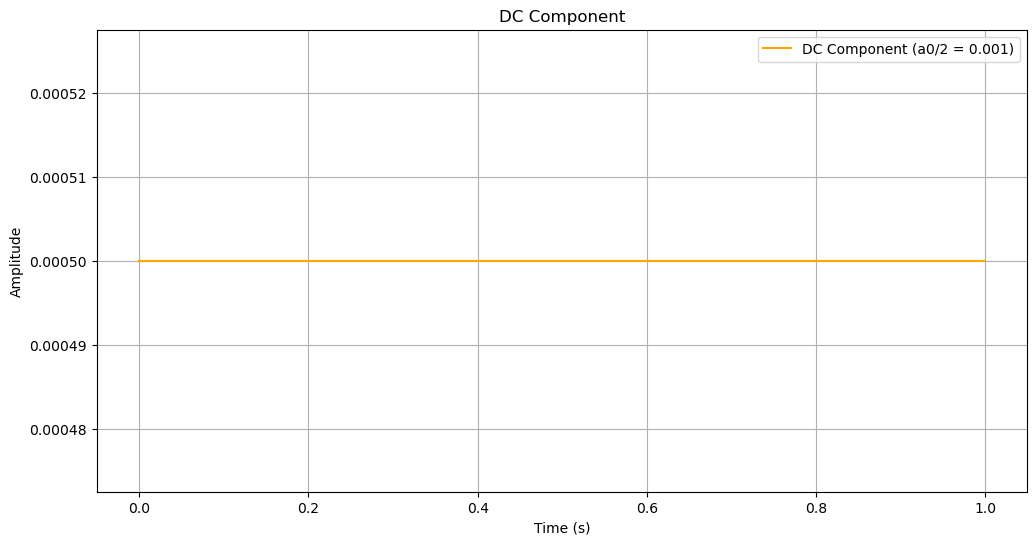

In [50]:
# DC Component

plt.figure(figsize=(12, 6))
plt.plot(t, np.full_like(t, a0 / 2), label=f"DC Component (a0/2 = {a0/2:.3f})", color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("DC Component")
plt.legend()
plt.grid()

**Sine Components**: The sine terms ($ b_k \sin(2\pi kt / T) $) for $ k = 1, 2, 3 $ 

Note that, for $ b_k $:

$$
b_k = \frac{2}{T} \int_0^T s(t) \sin\left(\frac{2\pi k t}{T}\right) \, dt
$$

For $ k = 2 $ (or any even $ k $), the square wave alternates in such a way that the positive and negative parts of the sine wave cancel each other out perfectly, resulting in:

$$
b_2 = 0
$$

**Generalized Consequence**  
- $ b_k $ is zero for all even $ k $, so the sine components for even $ k $ do not contribute to the signal.
- The observed "line" is likely just the $ y = 0 $ line, which corresponds to the sine component's absence for $ k = 2 $.

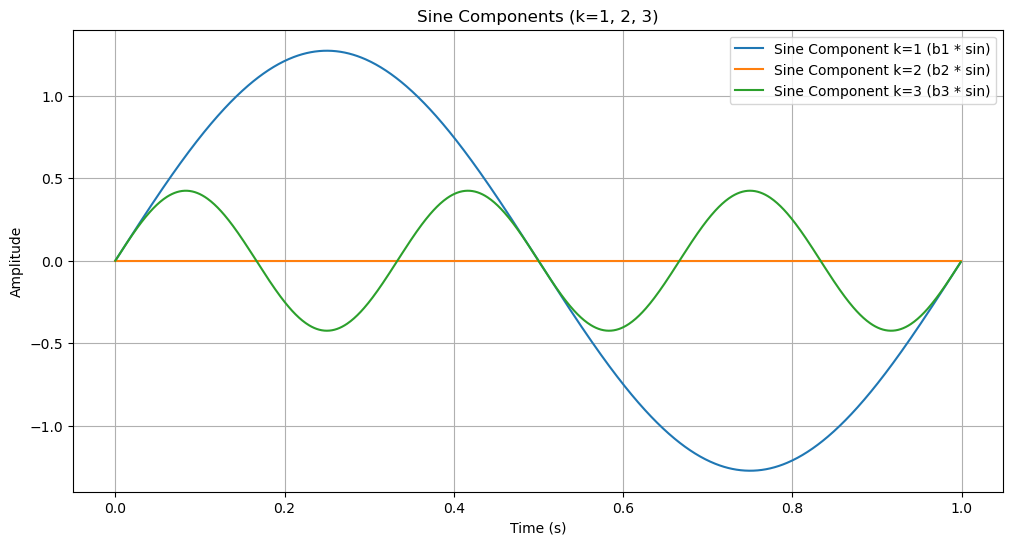

In [51]:
# Sine Components for K = 1, 2, 3
plt.figure(figsize=(12, 6))
for k in range(1, 4):
    sine_component = bk[k - 1] * np.sin(2 * np.pi * k * t / T)
    plt.plot(t, sine_component, label=f"Sine Component k={k} (b{k} * sin)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Components (k=1, 2, 3)")
plt.legend()
plt.grid()

**Cosine Components**: The cosine terms ($ a_k \cos(2\pi kt / T) $) for $ k = 1, 2, 3 $

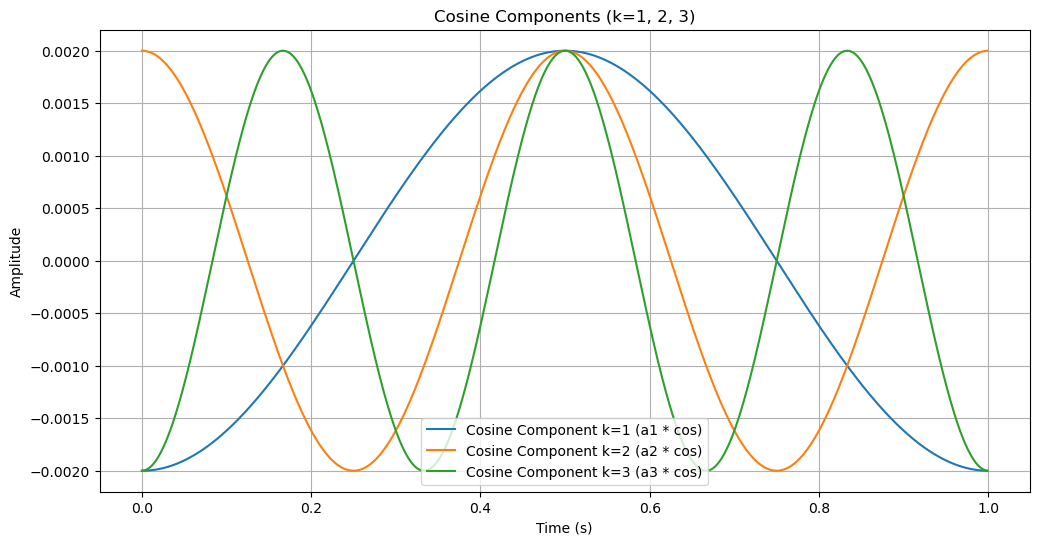

In [52]:
# Cosine Components for K = 1, 2, 3
plt.figure(figsize=(12, 6))
for k in range(1, 4):
    cosine_component = ak[k - 1] * np.cos(2 * np.pi * k * t / T)
    plt.plot(t, cosine_component, label=f"Cosine Component k={k} (a{k} * cos)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Cosine Components (k=1, 2, 3)")
plt.legend()
plt.grid()

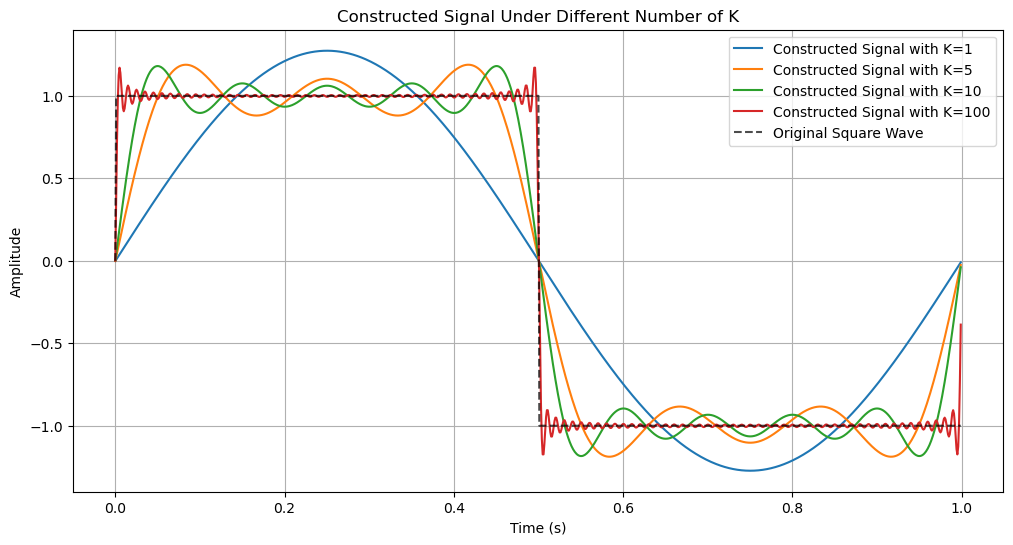

In [53]:
# Construct signal s(t) based on Fourier series
constructed_signals = []

for k_max in [1, 5, 10, K]:  # Different numbers of harmonics
    s_t = a0 / 2  # Initialize with DC component
    for k in range(1, k_max + 1):
        s_t += ak[k - 1] * np.cos(2 * np.pi * k * t / T) + bk[k - 1] * np.sin(2 * np.pi * k * t / T)
    constructed_signals.append((k_max, s_t))

# Plot constructed signal for different numbers of K
plt.figure(figsize=(12, 6))
for k_max, s_t in constructed_signals:
    plt.plot(t, s_t, label=f"Constructed Signal with K={k_max}")
plt.plot(t, square_wave, 'k--', label="Original Square Wave", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Constructed Signal Under Different Number of K")
plt.legend()
plt.grid()
plt.show()


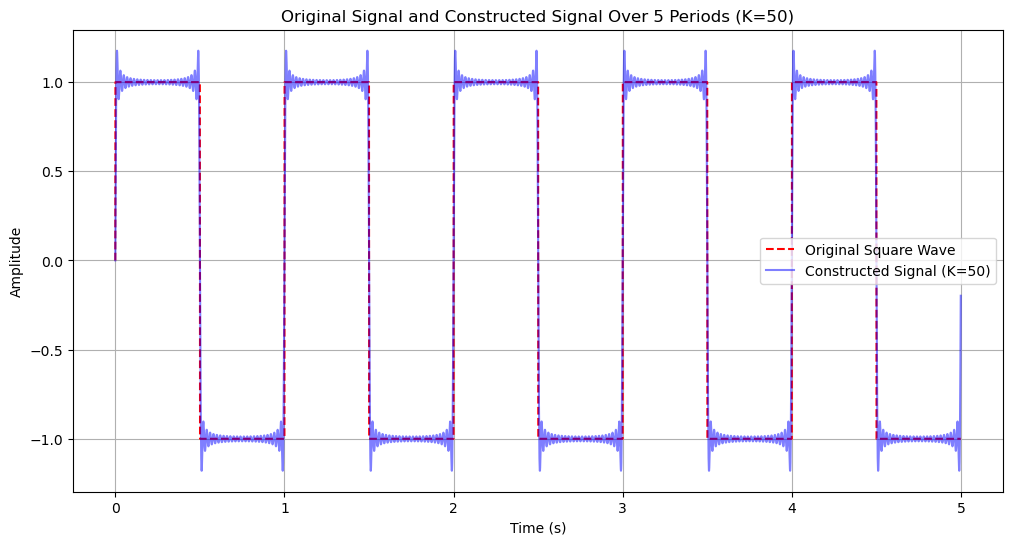

In [54]:
# Parameters for extended time range
periods = 5  # Number of periods to plot
t_extended = np.linspace(0, T * periods, samples * periods, endpoint=False)  # Extended time vector

# Generate the extended square wave signal
square_wave_extended = np.sign(np.sin(2 * np.pi * t_extended / T))

# Construct the signal with K = 100 harmonics
K_max = 50
a0_extended = np.mean(square_wave)  # DC component
s_t_extended = a0_extended / 2  # Start with the DC component
for k in range(1, K_max + 1):
    s_t_extended += (
        ak[k - 1] * np.cos(2 * np.pi * k * t_extended / T)
        + bk[k - 1] * np.sin(2 * np.pi * k * t_extended / T)
    )

# Plot the original signal and the constructed signal
plt.figure(figsize=(12, 6))
plt.plot(t_extended, square_wave_extended, label="Original Square Wave", linestyle="--", color="red")
plt.plot(t_extended, s_t_extended, label=f"Constructed Signal (K={K_max})", color="blue", alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Original Signal and Constructed Signal Over {periods} Periods (K={K_max})")
plt.legend()
plt.grid()
plt.show()
